### Display Raw Data

In [23]:
import Modularized_Data_Processing as mdp
import mne

filepath = r"C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\BCIproject_trial-1.2-11-2021_raw.fif.gz"

#Load data
data = mdp.load_data(filepath)

Opening raw data file C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\BCIproject_trial-1.2-11-2021_raw.fif.gz...
    Range : 0 ... 124702 =      0.000 ...   124.702 secs
Ready.
Reading 0 ... 124702  =      0.000 ...   124.702 secs...


In [12]:
data.info

<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, Fp2, CP1, CP2, FC1, FC2, O1, O2, F7, F8, Fz, Cz, T3, T4, P3, P4
 chs: 16 EEG
 custom_ref_applied: False
 dig: 19 items (3 Cardinal, 16 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 16
 projs: []
 sfreq: 1000.0 Hz
>

In [13]:
sfreq = data.info['sfreq']
print("Sample freq (sfreq) is: " + str(sfreq) + " Hz")

Sample freq (sfreq) is: 1000.0 Hz


In [14]:
data.info.ch_names

['Fp1',
 'Fp2',
 'CP1',
 'CP2',
 'FC1',
 'FC2',
 'O1',
 'O2',
 'F7',
 'F8',
 'Fz',
 'Cz',
 'T3',
 'T4',
 'P3',
 'P4']

In [22]:
%matplotlib widget

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1651 samples (1.651 sec)



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

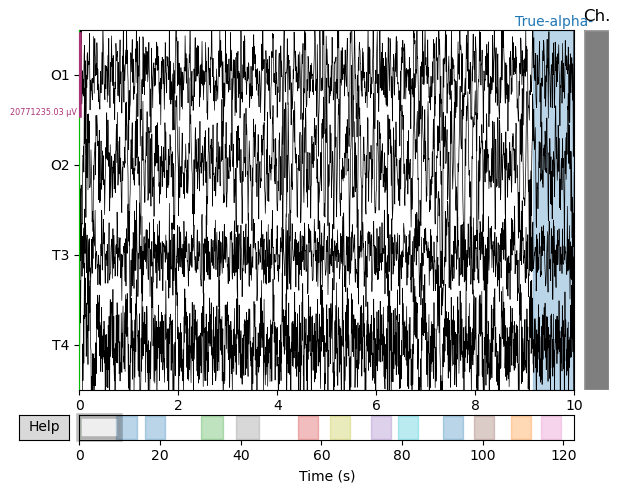

In [24]:
#display raw data

chns = data.info.ch_names

picks = ["O1", "O2", "T3", "T4"]

chn_idxs = []
for chn in picks:
    chn_idxs.append(chns.index(chn))

#apply the bandpass filter

low_fq = 5
hi_fq = 40

crpd_data = data.crop(2)
cd_fd_data = data.filter(5, 50)
    
cd_fd_data.plot(scalings="auto", order=chn_idxs, n_channels=4) #How do I make this interactive

### Display Alpha-Waves on a Spectrogram

In [25]:
[i["description"] for i in data.annotations]

['True-alpha-',
 'True-alpha-',
 'False-SSVEP-',
 'True-SSVEP-',
 'False-TMI-a-',
 'True-TMI-a-',
 'False-TMI-i-',
 'True-TMI-i-',
 'False-LMI-a-',
 'True-LMI-a-',
 'False-LMI-i-',
 'True-LMI-i-']

In [28]:
epoch_type = "alpha"

f2 = mdp.get_epochs(epoch_type) #f1_empty should be empty in the case of alpha waves; only look at f2



Opening raw data file C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\\BCIproject_trial-S5_raw.fif.gz...
    Range : 0 ... 29316 =      0.000 ...   234.528 secs
Ready.
Reading 0 ... 29316  =      0.000 ...   234.528 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 207 samples (1.656 sec)



ValueError: Could not find any of the events you specified.